## Train Deep Learning Model

### step-1 load the preprocess data

In [1]:
import os
import numpy as np
import cv2
import gc # garbage collect
#os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# load the preprocessed data
data = np.load('./data/data_preprocess.npz')

In [3]:
X = data['arr_0'] # saved
y = data['arr_1']

In [4]:
X.shape, y.shape

((9959, 224, 224, 3), (9959,))

### Preprocessing "y"

In [5]:
np.unique(y) # cannot train categorical data, have to do data preprocessing

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [6]:
from sklearn.preprocessing import OneHotEncoder # convert to OneHotEncoder format

In [7]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1)) # convert to 2D array

In [8]:
y_array = y_onehot.toarray() # 4 columns, with each column representing a category of mask wearing. 

### Split the Data into Train and Test sets

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 224, 224, 3), (1992, 224, 224, 3), (7967, 4), (1992, 4))

### Deep Learning Model

![cnn](cnn.png)

In [11]:
# y_train

In [12]:
# cv2.imshow('a',x_train[-2])
# cv2.waitKey()
# cv2.destroyAllWindows()

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

2022-11-30 21:25:07.973576: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# convolution neural network

model = Sequential([ # sequential process
    layers.Conv2D(16,3,padding='same',input_shape=(224,224,3),activation='relu'), # same padding = 0 padding, 
                                                                                #activation function is Relu 
    layers.MaxPool2D(), # max pooling
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),# flaten the input
    layers.Dense(192,activation='relu'), # 192 neurons calculated based on the pyramidal function
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid') # number of outcomes = 4
]) 


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # learning rate as small as possible to 
                                                                                          #improve prediction
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

2022-11-30 21:25:15.810823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [16]:
# Training CNN
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10) # small batch size, otherwise memory issue; epoch larger the better

Epoch 1/10
266/266 [==============================] - 138s 515ms/step - loss: 0.2484 - accuracy: 0.9160 - val_loss: 0.0986 - val_accuracy: 0.9694
Epoch 2/10
266/266 [==============================] - 131s 493ms/step - loss: 0.0615 - accuracy: 0.9790 - val_loss: 0.1043 - val_accuracy: 0.9714
Epoch 3/10
266/266 [==============================] - 131s 492ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0780 - val_accuracy: 0.9784
Epoch 4/10
266/266 [==============================] - 133s 501ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.1359 - val_accuracy: 0.9739
Epoch 5/10
266/266 [==============================] - 124s 465ms/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 0.1212 - val_accuracy: 0.9739
Epoch 6/10
266/266 [==============================] - 130s 489ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.1171 - val_accuracy: 0.9724
Epoch 7/10
266/266 [==============================] - 124s 464ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.1213 -

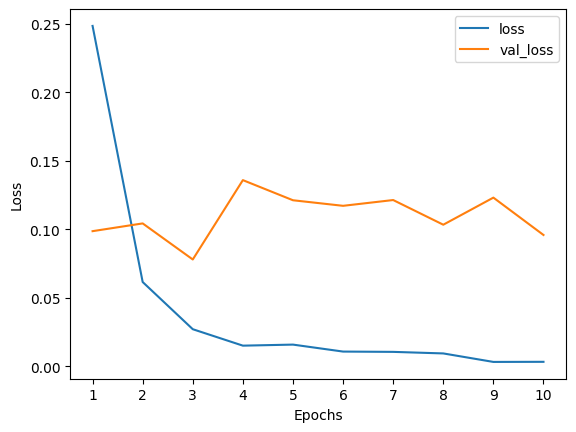

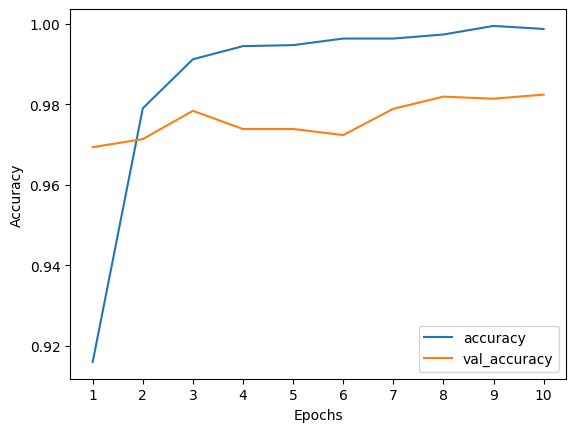

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df

history_df[['loss','val_loss']].plot(kind='line') # graph shows no over fit. Loss & validation loss are both decreasing
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line') # both train accuracy and test accuracy are increasing
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()



In [18]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.248397,0.916029,0.098630,0.969378
1,0.061521,0.979039,0.104288,0.971386
2,0.027088,0.991214,0.077971,0.978414
3,0.015090,0.994477,0.135872,0.973896
4,0.015854,0.994728,0.121184,0.973896
5,0.010767,0.996360,0.117127,0.972390
6,0.010550,0.996360,0.121343,0.978916
7,0.009414,0.997364,0.103337,0.981928
8,0.003217,0.999498,0.123108,0.981426
9,0.003293,0.998745,0.095848,0.982430


In [19]:
# Save CNN Model
model.save('face_cnn_model')



INFO:tensorflow:Assets written to: face_cnn_model/assets


INFO:tensorflow:Assets written to: face_cnn_model/assets


In [20]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]